# Лабораторная работа №2.
## Линейная нейронная сеть. Правило обучения Уидроу-Хоффа.
### Выполнила: Михеева Кристина Олеговна
#### Группа М8О-407Б-20
##### Вариант: 15

## Цель работы

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее обучения, применение сети в задачах аппроксимации и фильтрации


## Ход работы

## Задание 1
Использовать линейную нейронную сеть с задержками для аппроксимации функции. В
качестве метода обучения использовать адаптацию.


Для начала извлечем некоторые библиотеки, которые помогут нам в выполнении данной работы. Для построение графика нам понадобится библиотека - *matplotlib*, для выполнение операций с массивами мы подключим - *numpy*, а также библиотеку для обучния нейронных сетей - *torch*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

Задаем данные из условия варианта

In [2]:
h1 = 0.01     # шаг
h2 = 0.025

tuple1 = (1, 3)    # диапозон
tuple2 = (1, 6)

def input1(t):              # первая входная функция
  return np.sin(np.sin(t)* t**3 - 10)

def input2(t):               # вторая вхадная функция
  return np.cos(t**2 - 10*t + 3)

def output(t):                    # выходная функция
  return (np.cos(t**2 - 10*t + 6))/5


Создаем массив t1,который представляет собой временные точки.

И массив x1, который представляет собой соответствующие входные данные в зависимости от t1.

In [3]:
t1 = np.arange(tuple1[0], tuple1[1], h1)
x1 = input1(t1)

Создаем функцию функцию prediction(x, d), которая используется для создания набора данных на задачи прогнозирования.

d - это задержка (delay) для прогнозирования. Он указывает, сколько предыдущих значений будет использоваться для прогнозирования следующего значения.

In [4]:
def generator_data(x, d):
    x_train = []
    y_train = []

    for i in range(len(x) - d):
        x_train.append(x[i:i+d]) # создает срез (slice) входного массива x от текущего индекса i до i+d. Это окно будет использоваться как входные данные для прогнозирования.
        y_train.append(x[i+d])   #x[i+d] берется из входного массива x и будет использоваться в качестве соответствующего выходного значения.

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    if len(x_train) != len(y_train):
        raise ValueError("Длины x_train и y_train не совпадают")

    return x_train, y_train


Применяем фукцию prediction для данных х1 с задержкоц равной пяти.

In [ ]:
x_train1, y_train1 = generator_data(x1, d = 5)

x_train1 = torch.FloatTensor(x_train1)
y_train1 = torch.FloatTensor(y_train1)

Создаем обучающую модель на основе первой лабораторной работы.

Для более точного результата, я адаптировала свою предыдущую модель из перовй лаборатоной работы, сделав ее многослойной.


In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
input_size = 5  # Размер входа, так как delay=5
output_size = 1
model1 = Model(input_size, output_size)

In [ ]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

In [ ]:
epochs = 50
losses = []

x_train = torch.Tensor(x_train1)
y_train = torch.Tensor(y_train1)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model1(x_train)
    loss = loss_func(outputs.view(-1), y_train)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()


Выводи посленее значений функции потерь

In [ ]:
losses[-1]

0.0012118448503315449

Стром график функции потерь и грифики входных данных с предсказанием.

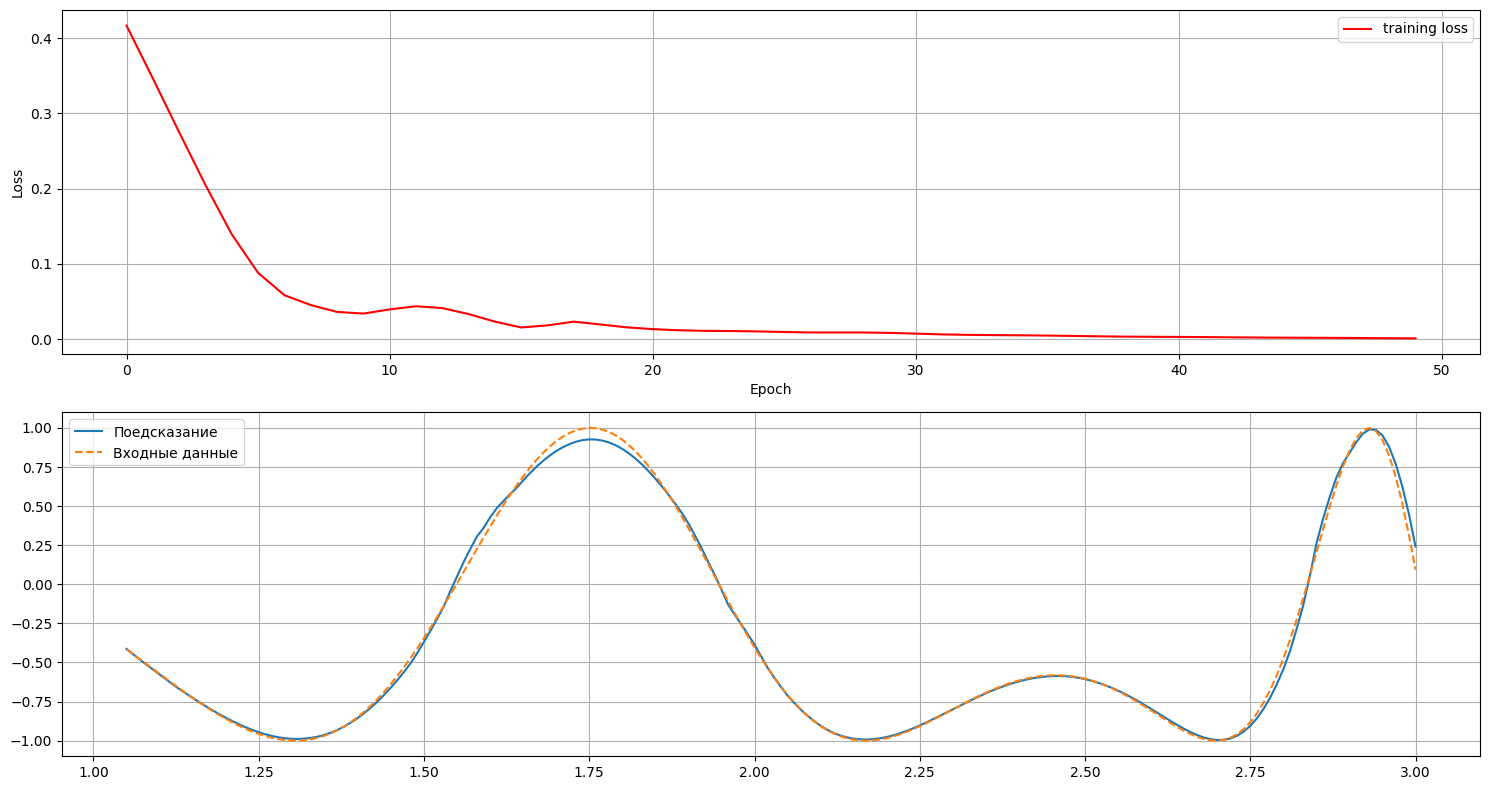

In [ ]:
# Рассчитываем предсказания модели после обучения
predicted = model1(x_train1).detach().numpy()

# Визуализация результатов
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 2)
plt.plot(t1[5:], predicted, label='Предсказание')
plt.plot(t1[5:], x1[5:], label='Входные данные', linestyle='--')
plt.legend()
plt.grid()

plt.subplot(2, 1, 1)
plt.plot(losses, label='loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Как можно заметить график "Предсказание" и  "Входнные данные" почти сопадают идельно, но есть небольшая погрешность.

То есть наша модель давольно неплохо предсказывает следующую точку.

## Задание 2
Использовать линейную нейронную сеть с задержками для аппроксимации функции и
выполнения многошагового прогноза.

Зададим функцию с входными данными, у которой шаг предсказания будет идти на 10 вперед.

In [5]:
t10 = np.linspace(t1[0], t1[1] + 10 * h1, 10)
x10 = input1(t10)


Тоже самое выполним для многошагового предсказания.

In [6]:
x_train2, y_train2 = generator_data(x1, d = 3)

x_train2 = torch.FloatTensor(x_train2)
y_train2 = torch.FloatTensor(y_train2)

In [7]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
input_size = 3  # Размер входа, так как delay=3
output_size = 1
model2 = Model(input_size, output_size)

In [37]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01, momentum = 0.9)

In [38]:
epochs = 600
losses = []

x_train = torch.Tensor(x_train2)
y_train = torch.Tensor(y_train2)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model2(x_train)
    loss = loss_func(outputs.view(-1), y_train)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()


Сделаем прогноз на 10 шагов вперед.

In [20]:
x_pred = x_train2[-1] #Ициализируется последними известными значениями временного ряда.
for i in range(10):
    # Подготовьте входные данные для модели (последние 3 известных значения)
    input_data = torch.Tensor(x_pred[-3:]).view(1, -1)
    # Предсказание следующего значения
    with torch.no_grad():
        prediction = model2(input_data)
    # Предсказанное значение добавляется к x_pred для дальнейшего использования в следующей итерации цикла.
    x_pred = np.append(x_pred, prediction.numpy())


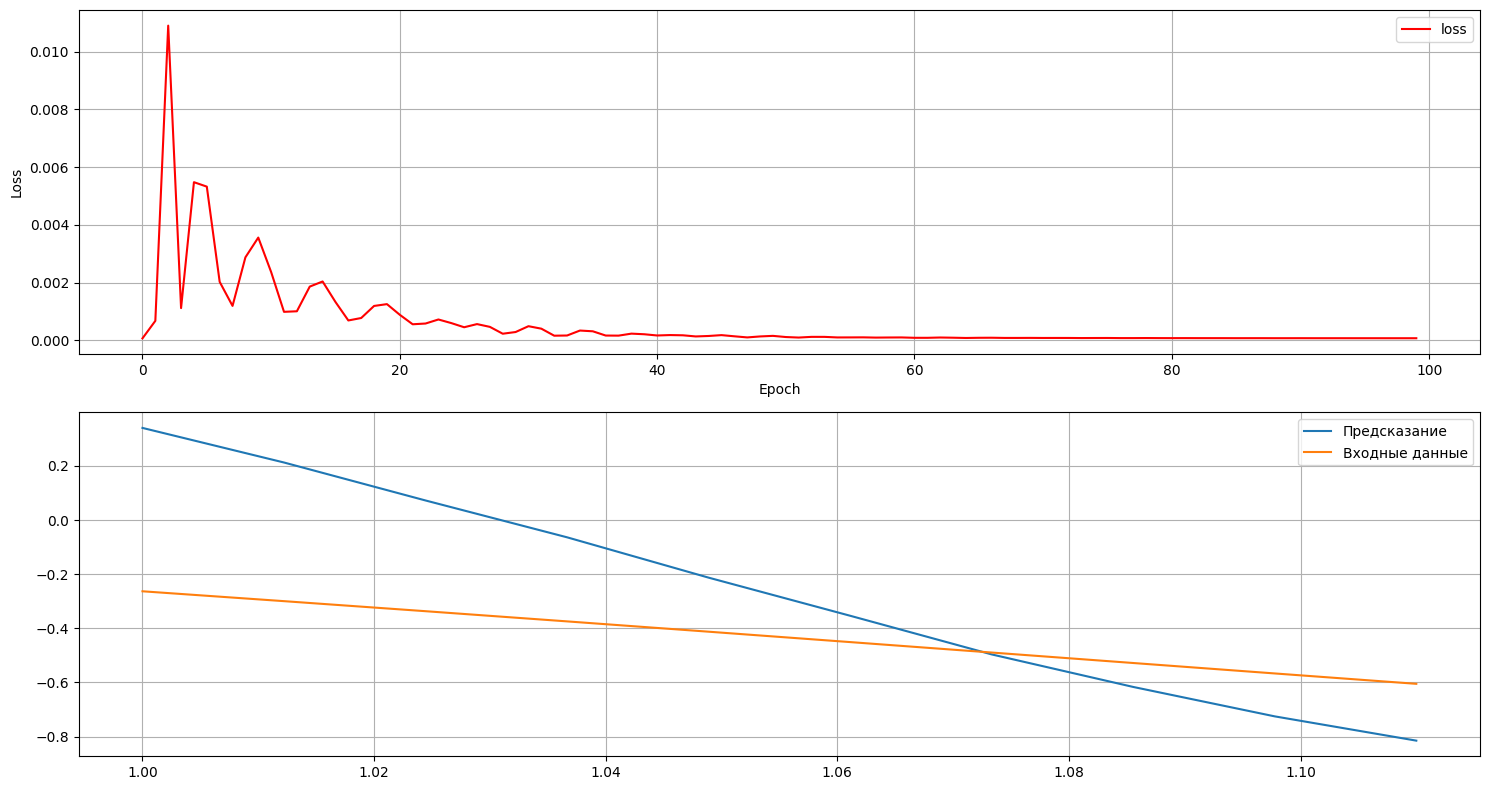

In [21]:
# Визуализация результатов
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 2)
plt.plot(t10, x_pred[3:], label='Предсказание')
plt.plot(t10, x10, label='Входные данные')  # Добавляем исходную функцию
plt.legend()
plt.grid()

plt.subplot(2, 1, 1)
plt.plot(losses, label='loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Как можно заметить модель не смогла хорошо обучится предсказывать значения, можно предположить, что этосвязано с ошибкой накапливания.

 При многошаговом предсказании ошибки предсказаний могут накапливаться с каждым шагом, что приводит к увеличению расхождения между предсказанными и фактическими данными.

## Задание 3
Использовать линейную нейронную сеть в качестве адаптивного фильтра для подавления
помех. Для настройки весовых коэффициентов использовать метод наименьших квадратов.


Используем вторые входные  и выходные данные.

In [ ]:
t2 = np.arange(tuple1[0], tuple2[1] + 1,  h2)
x2 = input2(t2)
y = output(t2)


Напишем функцию для подготки данных и создания датасета для обучения адаптивного фильтра.

In [ ]:
def generator_data_filter(x, y, d):
    x_train = []
    y_train = []

    for i in range(len(x) - d):
        x_train.append(x[i:i+d])
        y_train.append(y[i+d])

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    if len(x_train) != len(y_train):
        raise ValueError("Длины x_train и y_train не совпадают")

    return x_train, y_train

In [ ]:
x_train3, y_train3 = generator_data_filter(x2, y, d = 4)

x_train3 = torch.FloatTensor(x_train3)
y_train3 = torch.FloatTensor(y_train3)

Обучаем нашу модель.

In [ ]:
# Создание более глубокой модели
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
input_size = 4  # Размер входа, так как delay=5
output_size = 1
model3 = Model(input_size, output_size)


In [ ]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.01)

In [ ]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model3(x_train3)
    loss = loss_func(outputs, y_train3.view(-1, 1))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [ ]:
losses[-1]

0.00016242956917267293

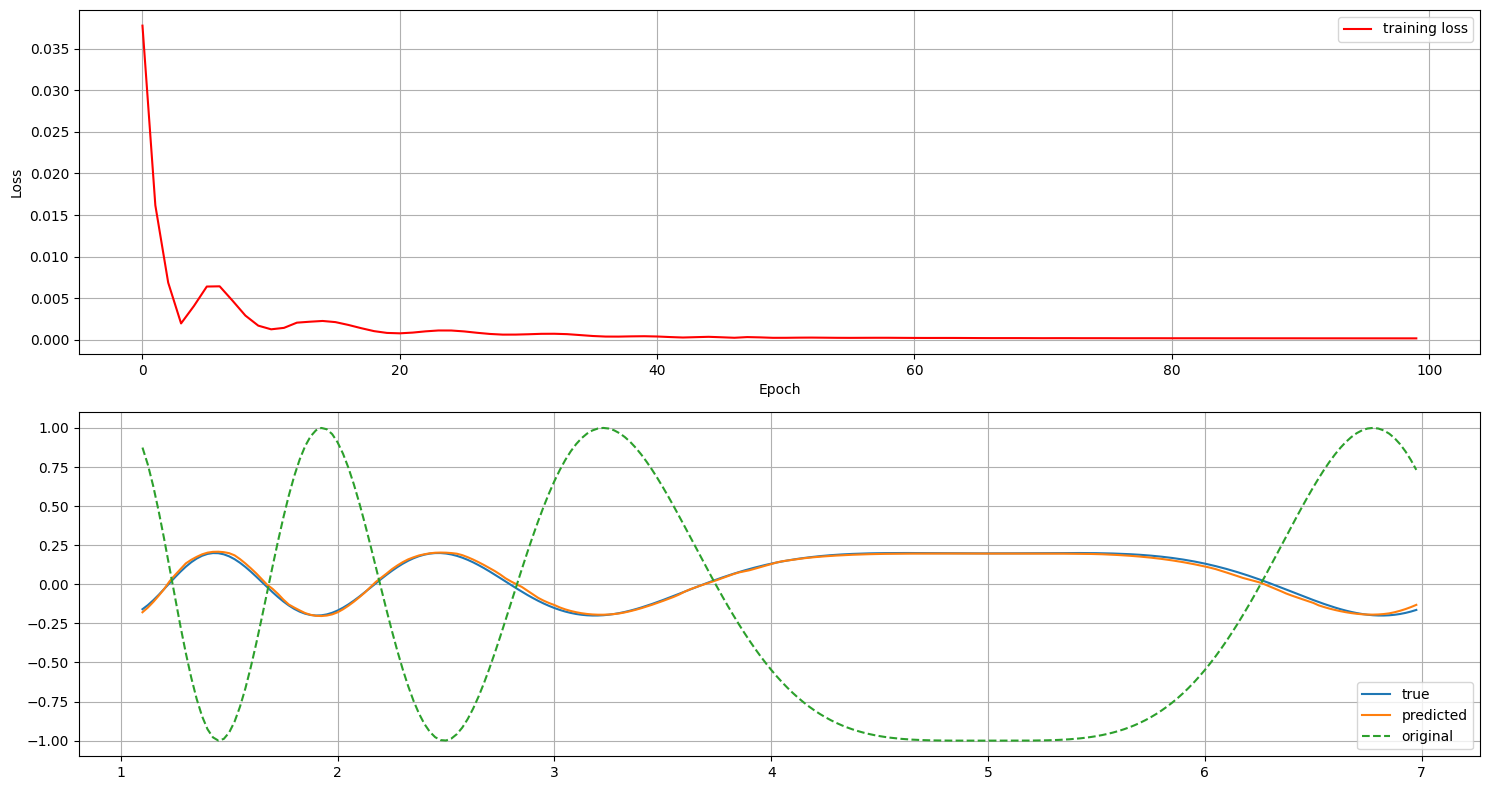

In [ ]:
# Рассчитываем предсказания модели после обучения
predicted = model3(x_train3).detach().numpy()

# Визуализация результатов
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 2)
plt.plot(t2[4:], y[4:], label='Выходные данные')
plt.plot(t2[4:], predicted, label='Предсказание')
plt.plot(t2[4:], x2[4:], label='Входные данные', linestyle='--')  # Добавляем исходную функцию
plt.legend()
plt.grid()

plt.subplot(2, 1, 1)
plt.plot(losses, label='training loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Заметим, что предсказанные данные почти идельно наложились на выходные данные, наша модель хорошо научилась предсказывать выходные значения.

## Вывод

В данной лабораторной работе я научилась решать задачи на предсказвания данных. Моя модель обучалась предсказывать следующие значения на основе предыдущих на один шаг, 10 шагов и с помощью адаптивного линейного фильтра.

Для предсказвания на один шаг модель справилась почти идельно, но уже с 10 шагами уже не ничего не получилось, из-за того, что задача предсказания многих шагов вперёд сложнее, а также может быть из-за накаплваемой ошибки.

Для адаптивного линейного фильтра как и для с шагом 1, модель обучалась достаточно хорошо и предсказания совпали с выходными значениями.